In [1]:
import pandas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

data = pandas.read_csv("reviews.csv")

**Zadání:** V tomto cvičení zkus naimplementovat klasifikátor, který rozpozná pozitivní recenzi produktu od negativní. Pracuj se souborem [reviews.csv](reviews.csv). Soubor obsahuje text recenze, a výstupní proměnnou `label` se dvěma hodnotami, `neg` a `pos`. Můžeš si všimnout, že data už nějakým čištěním prošla. Porovnej alespoň dva algoritmy. Jaké je nejlepší f1-score, kterého jsi dosáhl/a?

V tomto cvičení zkus naimplementovat klasifikátor, který rozpozná pozitivní recenzi produktu od negativní. Pracuj se souborem [reviews.csv](reviews.csv). Soubor obsahuje text recenze, a výstupní proměnnou `label` se dvěma hodnotami, `neg` a `pos`. Můžeš si všimnout, že data už nějakým čištěním prošla. Porovnej alespoň dva algoritmy. Jaké je nejlepší f1-score, kterého jsi dosáhl/a?

In [2]:
X = data["review"]
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train_text = X_train
X_train_text = X_train_text.reset_index(drop=True)
# Použijeme TfidfVectorizer s anglickými stop words, samostatná slova a dvojice slov
vec = TfidfVectorizer(stop_words="english", ngram_range=(1, 2))
X_train = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

# Jako algoritmus využijeme Support Vector Machine
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test_vec)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label="pos"))

0.8206666666666667
0.8181203515889114


Výsledný model má accuracy 82.1 % a f1-score 81.8 %

Můžeme si vyzkoušet funkci `classification_report`, která vypíše všechny metriky jako tabulku.

In [3]:
report_2 = classification_report(y_test, y_pred)
print(report_2)

              precision    recall  f1-score   support

         neg       0.82      0.83      0.82       758
         pos       0.82      0.82      0.82       742

    accuracy                           0.82      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.82      0.82      0.82      1500



Vedle SVM můžeme vyzkoušet i algoritmus K Nearest Neighbors, který dosahuje nižší accuracy i f1-score (obojí kolem 65 %).

In [4]:
clf_2 = KNeighborsClassifier()
clf_2.fit(X_train, y_train)
y_pred_knn = clf_2.predict(X_test_vec)
print(accuracy_score(y_test, y_pred_knn))
print(f1_score(y_test, y_pred_knn, pos_label="pos"))

0.648
0.6562499999999999


**Bonus 1:** Identifikuj ty recenze, které tvůj model označil špatně. Na pár z nich se podívej, a zkus odvodit, proč model chyboval.

Vytvoříme si nyní pandas tabulku `df_vysledek`, do které si uložíme text recenze a skutečnou a predikovanou hodnotu label. Můžeme použít dva způsoby: První z nich je vytvoření celé tabulky najednou, a to s využitím slovníku, do kterého vložíme jednotlivé sloupce.

In [5]:
df_vysledek = pandas.DataFrame({"text": X_test, "y_test": y_test, "y_pred": y_pred}).reset_index(drop=True)
df_vysledek

,text,y_test,y_pred
0,it 's a pretty convinient bag.i put a canon re...,pos,pos
1,got this camera because a friend had a similar...,pos,pos
2,made another bull**** album . honestly i did n...,neg,neg
3,this record is one of the best that has found ...,pos,pos
4,we have had this camera for about a year . we ...,neg,neg
...,...,...,...
1495,i was one of those that never got a chance to ...,pos,pos
1496,i purchased this item because of a recommendat...,neg,pos
1497,for quite sometime lured by media publicity i ...,neg,neg
1498,even though a set looked exactly like on a pic...,neg,pos


Nyní si vytvoříme tabulku, do které vložíme pouze ty řádky, které se predikovaný a skutečný label liší.

In [6]:
df_vysledek_incorrect = df_vysledek[df_vysledek["y_test"] != df_vysledek["y_pred"]]
df_vysledek_incorrect.to_csv("errors.csv", index=False)
df_vysledek_incorrect = df_vysledek_incorrect.reset_index()
df_vysledek_incorrect.head()

,index,text,y_test,y_pred
0,11,margaux with an x is about a young lady who se...,neg,pos
1,13,has any one tried the compatible battery from ...,pos,neg
2,21,"i do n't know , but. . i could n't get myself ...",neg,pos
3,29,this was required reading for my british liter...,neg,pos
4,31,i have now seen several gerry anderson project...,neg,pos


Druhá možnost je trochu pracnější a spočívá ve vytvoření tabulky postupně - začneme se sloupcem `X_test` a postupně přidáme zbývající dva.

In [7]:
df_vysledek = pandas.DataFrame(X_test)
df_vysledek = df_vysledek.rename(columns={"review": "text"})
df_vysledek["y_test"] = y_test
df_vysledek["y_pred"] = y_pred
df_vysledek

,text,y_test,y_pred
256,it 's a pretty convinient bag.i put a canon re...,pos,pos
1773,got this camera because a friend had a similar...,pos,pos
4967,made another bull**** album . honestly i did n...,neg,neg
4298,this record is one of the best that has found ...,pos,pos
2385,we have had this camera for about a year . we ...,neg,neg
...,...,...,...
3681,i was one of those that never got a chance to ...,pos,pos
4421,i purchased this item because of a recommendat...,neg,pos
4442,for quite sometime lured by media publicity i ...,neg,neg
189,even though a set looked exactly like on a pic...,neg,pos


Vytvoření tabulky se řádky, kde se náš model mýlil, je úplně stejné.

In [8]:
df_vysledek_incorrect = df_vysledek[df_vysledek["y_test"] != df_vysledek["y_pred"]]
df_vysledek_incorrect.to_csv("errors.csv", index=False)
df_vysledek_incorrect = df_vysledek_incorrect.reset_index()
df_vysledek_incorrect.head()

,index,text,y_test,y_pred
0,1133,margaux with an x is about a young lady who se...,neg,pos
1,3116,has any one tried the compatible battery from ...,pos,neg
2,69,"i do n't know , but. . i could n't get myself ...",neg,pos
3,4763,this was required reading for my british liter...,neg,pos
4,1518,i have now seen several gerry anderson project...,neg,pos


Podívejme se nyní na příklad recenze, která byla ohodnocená špatně. Recenze se ve výsledném souboru nachází na řádku č. 3 (při počítání od 0). Text je níže. Z textu je zřejmné, že autor nebo autorka se snažil(a) napsat recenzi velmi zdvořile, což asi náš model zmátlo.

*this was required reading for my british literature class . it 's the only novel in the class that i struggled with and only struggled from boredom . it is entirely possible that i just do not understand the genius that is forster , but i did not enjoy this novel . a lover of forster or modernist writing might enjoy it more . it must be a classic for a reason .*

Podívejme se ale na data důkladněji. Vytvořme si pandas tabulku s hodnotami koeficientů.

In [9]:
df_coef = pandas.DataFrame(clf.coef_.T, columns=["coef"])
df_coef["words"] = vec.get_feature_names_out()
df_coef

,coef,words
0,0.068115,00
1,-0.019711,00 00
2,0.143954,00 22
3,-0.026372,00 8mp
4,-0.036801,00 avoid
...,...,...
248472,0.017760,áron solace
248473,0.017760,áron tamás
248474,0.017760,áron undergoes
248475,0.017760,árpád


Dále si vytvoříme pole pouze s textem této recenze a pomocí `TfidfVectorizer` z něj uděláme číselné pole. To převedeme na pandas tabulku.

In [10]:
test_text = df_vysledek_incorrect.iloc[[3]]["text"]
test_text = vec.transform(test_text)
test_text = test_text.toarray()
test_text = pandas.DataFrame(test_text.T, columns=["coef"])
test_text = test_text[test_text["coef"] != 0]
test_text

,coef
26569,0.195791
28616,0.156212
40302,0.271575
40381,0.118607
58475,0.069224
58614,0.172249
70478,0.218548
70496,0.213600
71167,0.152781
85568,0.427201


Indexy v obou tabulkách odpovídají stejným slovům nebo kombinacím slov, můžeme tedy obě tabulky propojit s využitím indexů.

Sloupec `coef_x` označuje hodnotu koeficientu, který slovu nebo kombinaci slov dal algoritmus SVM. Kladná čísla jsou spíše ve prospěch hodnocení `pos` a záporná čísla ve prospěch hodnocení `neg`. Sloupec `coef_y` označuje koeficient, který slovu dal `TfidfVectorizer`.

In [11]:
df_coef_merged = pandas.merge(df_coef, test_text, left_index=True, right_index=True)
df_coef_merged = df_coef_merged.sort_values(by=["coef_x"])
df_coef_merged

,coef_x,words,coef_y
58475,-1.657176,did,0.069224
114833,-0.674810,just,0.058796
177499,-0.467464,reason,0.106611
246039,-0.404450,writing,0.117364
176264,-0.277814,reading,0.102217
71167,-0.273497,entirely,0.152781
126010,-0.133594,literature,0.153597
148421,-0.121172,novel,0.256585
26569,-0.103564,boredom,0.195791
164632,-0.052317,possible just,0.224018


Dále si můžeme prověřit i nějaké konkrétní slovo nebo kombinaci slov. Kupříkladu kombinace "required reading" může být lehce podezřelá, protože povinná četba často nepatří mezi nejoblíbenější kratochvíle studující mládeže. Podíváme se, kolik textů toto sousloví obsahuje a jaké jsou jejich skutečné labels. Vycházet budeme nyní z trénovacích dat, protože na nich se SVM "učil" hodnoty koeficientů.

In [12]:
word = "required reading"
df_selected_word = pandas.DataFrame({"text": X_train_text, "label": y_train})
df_selected_word = df_selected_word.dropna()
df_selected_word = df_selected_word[df_selected_word["text"].str.contains(word)]
df_selected_word.to_csv("df_selected_word.csv", index=False)
df_selected_word

,text,label
391,this book was & quot ; required reading&quot ;...,pos
1987,in 1995 the poverty level for a family of four...,pos
4360,these books will one day be recorded as histor...,pos
4431,newt gingrich presents common sense solutions ...,neg


Vidíme, že 3 ze 4 recenzí jsou pozitivní, takže algoritmus pravděpodobně postupoval správně.

**Bonus 2:** Všimni si, že soubor obsahuje také sloupec `product`, který identifikuje kategorii produktu.

1. Mohlo by být zajímavé se podívat, jestli je možné data do těchto kategorií shlukovat bez využití této informace. Data normalizuj (například pomocí `TfidfVectorizer`), a zkus spustit nějaký shlukovací algoritmus, například `KMeans`. Výsledky shlukování můžeš "obarvit" správnými kategoriemi. Povedlo se modelu predikovat kategorie? 

2. Vyzkoušej také klasifikaci do těchto kategorií. Které kategorie se těžko odlišují?

Nejprve vyzkoušíme vytvořit shluky bez redukce dimenzionality. Vytvoření shluků bez redukce dimenzionality je možné, pouze jej nejde vizualizovat. Můžeme ale vytvořit graf metriky `inertia` pro různé počty shluků.

Protože s dvojicemi slov by výpočty běžely opravdu dlouho, budeme uvažovat pouze jednotlivá slova.

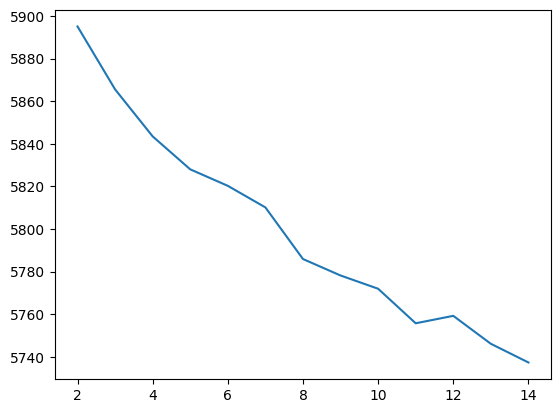

In [13]:
X_1 = data["review"]
y = data["label"]

vec = TfidfVectorizer(stop_words="english")
X_1 = vec.fit_transform(X_1)
distances = []
cluster_counts = range(2, 15)

for k in cluster_counts:
    model = KMeans(n_clusters=k, n_init="auto", random_state=42)
    model.fit(X_1)
    distances.append(model.inertia_)

plt.plot(cluster_counts, distances,)

Nyní vyzkoušíme redukovat data do dvou rozměrů, a to s využitím TSNE. Vidíme, že graf metriky `inertia` je "hladší" a neustále klesá.

Je třeba uvést, že TSNE není doporučená metoda pro redukci dimenzionality dat s velmi vysokým počtem sloupců, což naše data určitě jsou. Proto poté vyzkoušíme ještě algoritmus PCA (např. z důvodu, že výpočet trvá příliš dlouho).

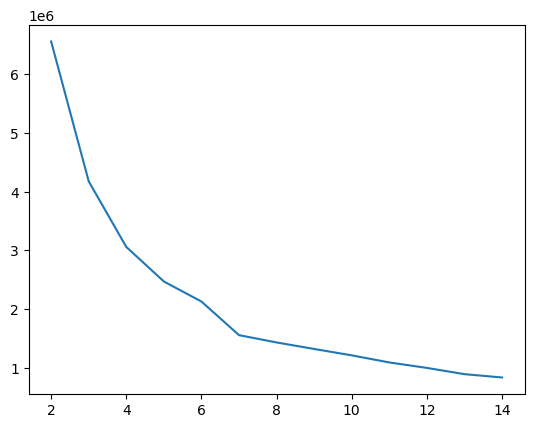

In [14]:
X_2 = data["review"]
y = data["label"]

vec = TfidfVectorizer(stop_words="english")
X_2 = vec.fit_transform(X_2).toarray()

tsne = TSNE(
    n_components=2,
    random_state=42,
)
X_2 = tsne.fit_transform(X_2)

distances = []
cluster_counts = range(2, 15)

for k in cluster_counts:
    model = KMeans(n_clusters=k, n_init="auto", random_state=42)
    model.fit(X_2)
    distances.append(model.inertia_)

plt.plot(cluster_counts, distances,)

Výsledek můžeme vizualizovat s využitím dvourozměrného grafu. Vidíme, že z grafu bychom nepoznali, kolik shluků je.

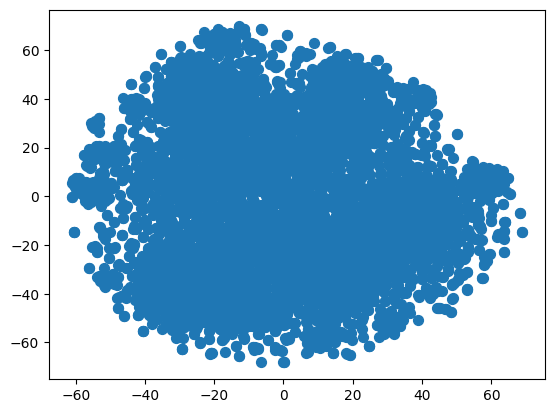

In [15]:
plt.scatter(X_2[:, 0], X_2[:, 1], s=50)

Přidáme do grafu jednotlivé shluky a centroidy.

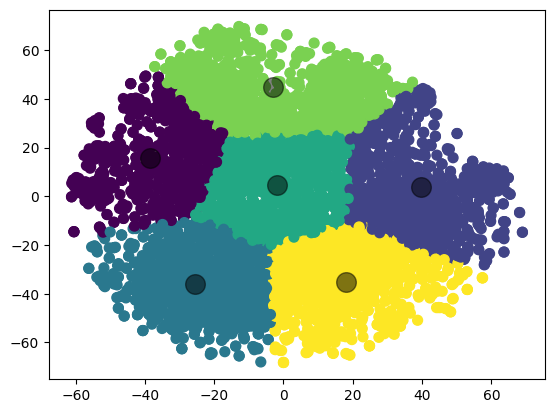

In [16]:
model = KMeans(n_clusters=6, random_state=42, n_init="auto")
labels = model.fit_predict(X_2)
centers = model.cluster_centers_
plt.scatter(X_2[:, 0], X_2[:, 1], c=labels, s=50)
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)

Nakonec vyzkoušíme ještě jiný způsob, jak snížit dimenzionalitu. Tím je metoda PCA Principal Component Analysis (PCA), což je jiný algoritmus pro redukci dimenzionality. Opět redukujeme na 2 dimenze a vytvoříme si graf metriky `inertia`.

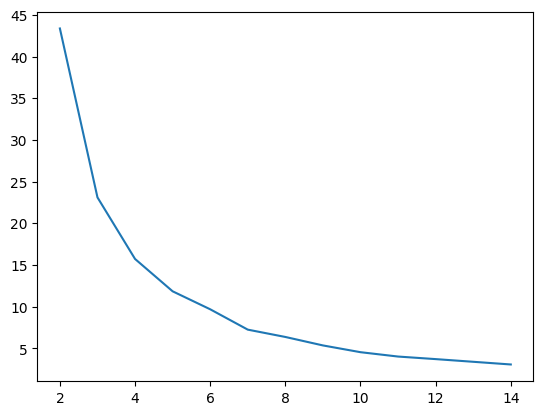

In [17]:
X_3 = data["review"]
y = data["label"]

vec = TfidfVectorizer(stop_words="english")
X_3 = vec.fit_transform(X_3).toarray()

pca = PCA(
    n_components=2,
    random_state=42,
)
X_3 = pca.fit_transform(X_3)

distances = []
cluster_counts = range(2, 15)

for k in cluster_counts:
    model = KMeans(n_clusters=k, n_init="auto", random_state=42)
    model.fit(X_3)
    distances.append(model.inertia_)

plt.plot(cluster_counts, distances,)


Nyní je samozřejmě otázka, kolik shluků bychom se rozhodli na základě grafu metriky vytvořit. Osobně bych volil 7, a to především na základě grafů s redukcí dimenzionality.

Podívejme se nyní, kolik produktů ve skutečnosti je. Je jich 6.

In [18]:
data["product"].unique()

array(['music', 'dvd', 'health', 'camera', 'software', 'books'],
      dtype=object)

Vezměme tedy původní data a podívejme se, jestli se liší výskyty produktů v jednotlivých shlucích. Použijeme 6 shluků, tj. stejný počet shluků jako produktů. Porováme výsledky pro data v původní dimenzi a data s oběma postupy pro redukci dimenzionality.

In [19]:
model = KMeans(n_clusters=6, random_state=42, n_init="auto")
labels_1 = model.fit_predict(X_1)
labels_2 = model.fit_predict(X_2)
labels_3 = model.fit_predict(X_3)
data["labels_1"] = labels_1
data["labels_2"] = labels_2
data["labels_3"] = labels_3

Porovnání provedeme pomocí pivot tabulky. Jako řádky zvolíme typy produktů a jako sloupce zvolíme clustery. Vidíme, že počty výskytů jednotlivých typů produktů se výrazně liší. Např. ve shluku 3 jsou téměř výhradně kamery, ve shluku 2 převažují knihy, ve shluku 4 DVD atd.

Pokud bychom data četli po řádcích, vidíme například, že drtivá většina z hudebních produktů je ve shluku 1, tam je ale spousta dalších typů produktů.

In [20]:
data.pivot_table(index="product", columns="labels_1", values="review", aggfunc=len, margins=True)

labels_1,0,1,2,3,4,5,All
product,,,,,,,
books,16.0,288.0,682.0,NaN,7.0,NaN,993
camera,270.0,167.0,NaN,539.0,1.0,11.0,988
dvd,7.0,306.0,10.0,NaN,507.0,182.0,1012
health,656.0,322.0,5.0,NaN,NaN,3.0,986
music,5.0,987.0,NaN,NaN,26.0,9.0,1027
software,828.0,133.0,7.0,2.0,NaN,24.0,994
All,1782.0,2203.0,704.0,541.0,541.0,229.0,6000


Níže jsou výsledky pro redukci dimenzionality s algoritmem TSNE. Oproti předchozímu modelu jsou ale všechny shluky přibližně stejně početné.

In [21]:
data.pivot_table(index="product", columns="labels_2", values="review", aggfunc=len, margins=True)

labels_2,0,1,2,3,4,5,All
product,,,,,,,
books,1,654,31,75,9,223,993
camera,266,6,6,73,630,7,988
dvd,9,66,112,175,6,644,1012
health,563,31,18,297,68,9,986
music,15,60,831,36,2,83,1027
software,14,263,30,160,471,56,994
All,868,1080,1028,816,1186,1022,6000


Nakonec máme výsledky při redukci dimenzionality s využitím algoritmu PCA.

In [22]:
data.pivot_table(index="product", columns="labels_3", values="review", aggfunc=len, margins=True)

labels_3,0,1,2,3,4,5,All
product,,,,,,,
books,18.0,NaN,593.0,3.0,NaN,379.0,993
camera,365.0,219.0,NaN,NaN,389.0,15.0,988
dvd,77.0,NaN,18.0,42.0,1.0,874.0,1012
health,769.0,NaN,4.0,NaN,4.0,209.0,986
music,20.0,NaN,NaN,735.0,NaN,272.0,1027
software,771.0,NaN,8.0,17.0,8.0,190.0,994
All,2020.0,219.0,623.0,797.0,402.0,1939.0,6000
